## Project: 🐶🐱 Pet Classification Model Using CNN
#### Author: Gyana Ranjan Mahapatra

### 🎯 Objective:
To build and train a Convolutional Neural Network (CNN) that can classify images of **cats** and **dogs**.

**1. Data Visualization: Cat & Dog Images**
* Loads and displays sample images of cats and dogs from the training dataset.
* Helps in visually inspecting variations in image size, format (landscape, portrait), and clarity.

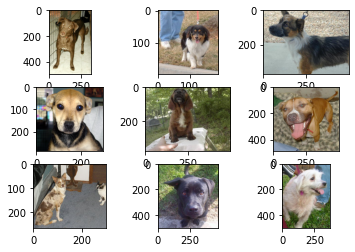

In [1]:
# plot dog photos from the dogs training dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'data/train/dogs/'
# plot first few images
for i in range(1,10):
    # define subplot
    pyplot.subplot(330 + i)
    # define filename
    filename = folder + str(i) + '.jpg'
    #print(filename)
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

We can see that some dogs photos are in landscape format, some are portrait format, and some are square.

Lets plot cats photos from training dataset and observe.

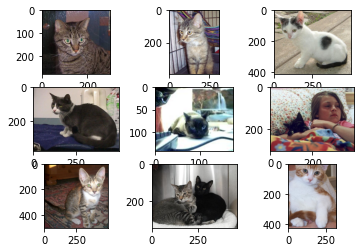

In [2]:
# plot cat photos from the cats training dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'data/train/cats/'
# plot first few images
for i in range(1,10):
    # define subplot
    pyplot.subplot(330 + i)
    # define filename
    filename = folder + str(i) + '.jpg'
    #print(filename)
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

Similarly, We can see that some catss photos are also in landscape format, some are portrait format, and some are square.

We can also see a photo where the cat is barely visible (second row last column) and another that has two cats (last row middle coumn). This suggests that any classifier fit on this problem will have to be robust.

**Inference:**
* Images vary in dimension and layout — reinforces the need for consistent preprocessing (resizing, normalization).
* Useful sanity check before feeding data into the CNN model.

In [3]:
# baseline model for the dogs vs cats dataset
# import required libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Softmax, Dropout

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

### Develop a Baseline CNN Model

The architecture involves stacking convolutional layers with small 5×5 filters followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network such as 32, 64 for the first two blocks of the model.

This model consist a 2-layer CNN with:
* Two convolution + pooling layers
* One dense hidden layer with dropout for regularization
* A final sigmoid layer for binary classification (cat vs dog)

In [70]:
# define cnn model
classifier = Sequential()
classifier.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) 
classifier.add(Conv2D(64,(5,5),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=1,activation='sigmoid'))
#classifier.add(Dense(1,activation='softmax'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])


In [165]:
%%capture
history = classifier.fit_generator(train_set,
                        steps_per_epoch=40, 
                        epochs = 10,
                        validation_data = test_set,
                        validation_steps = 20, 
                        #callbacks=[tensorboard]
                        );

  ...
    to  
  ['...']
  ...
    to  
  ['...']


### Data Augmentation
Using some **Data Augmentation** techniques for more data and Better results.

* **Shearing, zooming, horizontal flipping**
* **Rescaling** normalizes pixel values (0–1)


In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('data/train',
                                             target_size=(64,64),
                                             batch_size=1,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('data/test',
                                           target_size=(64,64),
                                           batch_size = 1,
                                           class_mode='binary',
                                           shuffle=False)

#Test Set (created cmbining all the images to test/visulize the final model)
test_set1 = test_datagen.flow_from_directory('data/test1',
                                            target_size=(64,64),
                                            batch_size=1,
                                            shuffle=False)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


**Inference:**
* This helps the model learn robust features despite image variations.
* Especially useful when training data is limited or imbalanced.

**Inference:**
Using separate folders for test/validation and test1 ensures more realistic model evaluation on unseen images.

### Prediction of Single Image

* Loads one test image (a cat), processes it, and predicts its class.
* Displays prediction label (Cat/Dog with probability) on the image.

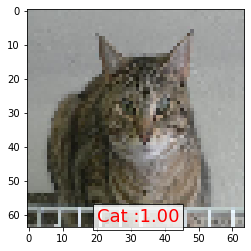

In [166]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('data/test/cats/103.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

**Inference:**
* Useful for visually verifying the model’s prediction confidence.
* A good tool for qualitative validation.

**Description:**
* Collects predictions for all validation images.
* Converts raw probabilities into binary labels using a threshold of 0.5.
* Counts how many predictions are **incorrect**.

In [167]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [168]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(20)

,filename,predict,y,y_pred
0,cats\101.jpg,0.00626,0,0
1,cats\102.jpg,0.01137,0,0
2,cats\103.jpg,0.00289,0,0
3,cats\104.jpg,0.13115,0,0
4,cats\105.jpg,0.01933,0,0
5,cats\106.jpg,0.99686,0,1
6,cats\107.jpg,0.47923,0,0
7,cats\108.jpg,0.00003,0,0
8,cats\109.jpg,0.86704,0,1
9,cats\110.jpg,0.00482,0,0


* Identifies images the model got wrong — helpful for error analysis.
* Helps answer: Are there specific images consistently misclassified (e.g., blurry, dark, multiple pets)?

In [169]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 20 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 20 Validation images : 6


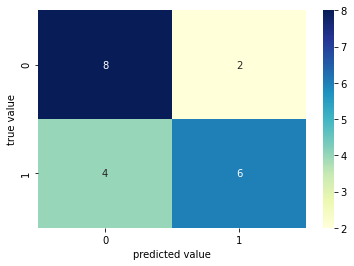

In [170]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Inference of Confusion Matrix:**
* Reveals whether the model has a bias toward cats or dogs.
* Helps assess precision vs recall imbalance if any.

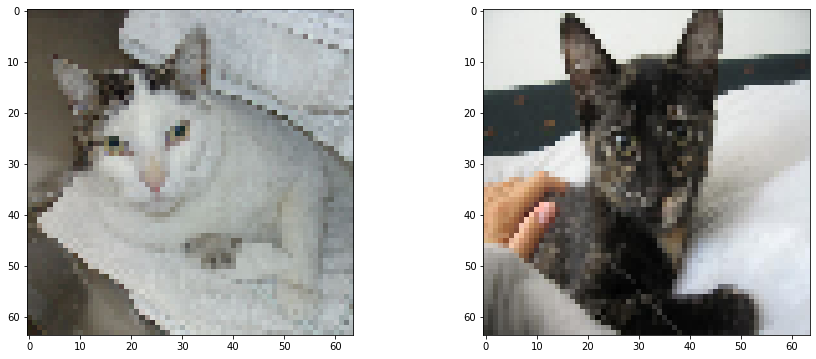

In [171]:
#Some of Cat image misclassified as Dog.
import matplotlib.image as mpimg
#print(df['filename'])
CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 2
rows = 1
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('data/test/'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

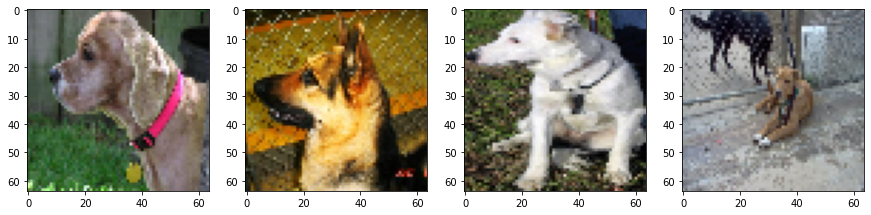

In [172]:
#Some of Dog image misclassified as Cat.
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 4
rows = 1
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('data/test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

In [173]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

### Line Plots of Loss and Accuracy Learning Curves

Below figure shows a line plot for the loss and another for the accuracy of the model on both the train (blue) and test (orange) datasets.

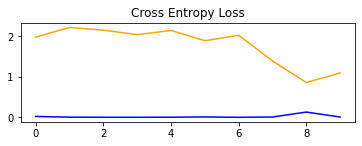

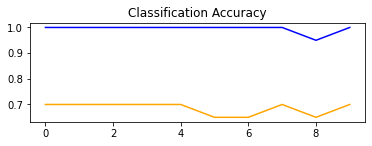

In [178]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.show()
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show()

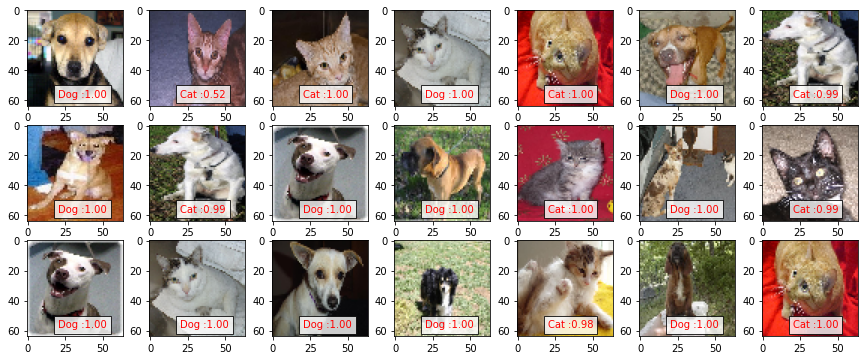

In [175]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('data/test1/'+test_set1.filenames[np.random.choice(range(60))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [176]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [177]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 100.00%     Training loss  : 0.001770
Validation Accuracy: 70.00%     Validation loss: 1.097308


### Conclusion
The Architecture and parameter used in this network are capable of producing accuracy of **70.00%** on Validation Data which is pretty good. It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training and including more data in training set. 